In [1]:
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import torch
from torchvision import datasets, transforms
import sys
sys.path.append("../") # go to parent dir
from utils import expspace


In [2]:
def calculate_coeff(data, min_i, max_i, log=False, plot=False, show=False):
    data = np.array(data)
    data_clean = data[np.all(~np.isnan(data), axis=1)]
    ind_sort = np.argsort(data_clean[:,0])
    data_clean = data_clean[ind_sort]
    d, ll = tuple(zip(*data_clean))

    d = d[min_i:max_i]
    ll = ll[min_i:max_i]

    d = np.array(d).reshape(-1,1)
    ll = np.array(ll)
#     print(d)
    
    if log:
        d = np.log(d)
#     regr = linear_model.TheilSenRegressor()
    regr = linear_model.LinearRegression()
    regr.fit(d, ll)
    ll_pred = regr.predict(d)

    if plot:
        plt.plot(d, regr.predict(d), label="prediction", c='r', alpha=0.5)
        plt.plot(d, ll, 'o-', alpha=0.5)
    if show:
        plt.show()
        
    return regr.coef_[0]


In [8]:
n_koni = 20
window = 5
directory = f"DATA_DIR"
directory_losses = directory
import glob
image_size = 32
n_channels = 3
n_pixel = image_size * image_size * n_channels
val_flag = True

fnames = []

for filename in sorted(glob.glob(f"{directory_losses}/*train*"), key=lambda a: float(a.split("_")[-2].split("#")[-1])):
    test_filename = filename.replace("train", "test")
    data = pd.read_csv(filename, header=None)
    delta = filename.split("#")[-1].split("_")[0]
    is_na = np.any(pd.isna(data.iloc[:,0]))
    data = pd.read_csv(test_filename, header=None)
    is_na_test = np.any(pd.isna(data.iloc[:,0]))
    if is_na or is_na_test:
        continue
    else:
        n = data.iloc[:,0].argmin()
        print(n, delta)
        fnames.append(glob.glob(f"{directory}/ll_*{delta}_{n}.txt")[0])
txt_list = []

for f in fnames[2:]:
    txt = pd.read_csv(f, sep=" ", header=None)
    txt_list.append(txt)
    
dims20 = []
for i in range(5000):
    if i % 1000 == 0:
        print(i)
    to_plot = []
    for txt in txt_list:
        if val_flag:
            noise, pz, logdet, _, _ = txt.iloc[i]
        else:
            noise, _, _, pz, logdet = txt.iloc[i]
        to_plot.append([noise, -(pz + logdet)])
    to_plot = np.array(to_plot)
    coef = calculate_coeff(to_plot, 0, 7, log=True, plot=False)
    dims20.append(n_pixel - coef)

n_koni = 40
window = 5
directory = f"DATA_DIR"
directory_losses = directory
import glob

fnames = []

for filename in sorted(glob.glob(f"{directory_losses}/*train*"), key=lambda a: float(a.split("_")[-2].split("#")[-1])):
    test_filename = filename.replace("train", "test")
    data = pd.read_csv(filename, header=None)
    delta = filename.split("#")[-1].split("_")[0]
    is_na = np.any(pd.isna(data.iloc[:,0]))
    data = pd.read_csv(test_filename, header=None)
    is_na_test = np.any(pd.isna(data.iloc[:,0]))
    if is_na or is_na_test:
        continue
    else:
        n = data.iloc[:,0].argmin()
        print(n, delta)
        fnames.append(glob.glob(f"{directory}/ll_*{delta}_{n}.txt")[0])
txt_list = []

for f in fnames[2:]:
    txt = pd.read_csv(f, sep=" ", header=None)
    txt_list.append(txt)
    
dims40 = []
for i in range(5000):
    if i % 1000 == 0:
        print(i)
    to_plot = []
    for txt in txt_list:
        if val_flag:
            noise, pz, logdet, _, _ = txt.iloc[i]
        else:
            noise, _, _, pz, logdet = txt.iloc[i]
        to_plot.append([noise, -(pz + logdet)])
    to_plot = np.array(to_plot)
    coef = calculate_coeff(to_plot, 0, 7, log=True, plot=False)
    dims40.append(n_pixel - coef)

53 0.3
51 0.34512302213634366
50 0.39703300136174385
64 0.45675076439276036
35 0.525450680567715
65 0.6044837562037613
64 0.695404202577903
59 0.8
0
1000
2000
3000
4000
33 0.3
51 0.34512302213634366
49 0.39703300136174385
48 0.45675076439276036
62 0.525450680567715
47 0.6044837562037613
30 0.695404202577903
37 0.8
0
1000
2000
3000
4000


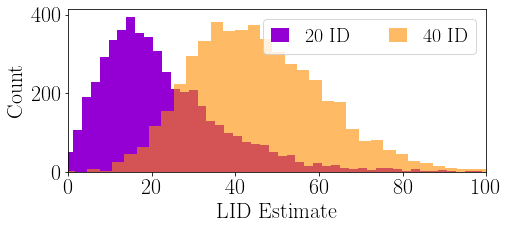

In [26]:
import matplotlib

matplotlib.rc('text', usetex=True)
plt.rcParams['font.family'] = 'serif'
label_size = 22
ticks_size = 22
legend_size = 20
fig, ax = plt.subplots(1, 1, figsize=(7.5,3))
ax.tick_params(labelsize=ticks_size)

ax.hist(dims20, bins=50, color='darkviolet', label="20 ID");
ax.hist(dims40, bins=50, alpha=0.6, color='darkorange', label="40 ID" );

plt.xlim(0, 100)
plt.legend(loc="upper right", ncol=2, fontsize=legend_size, handlelength=0.9)
ax.set_xlabel("LID Estimate", size=label_size)
ax.set_ylabel("Count", size=label_size);